In [12]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
#use dataset with
location = "datasets/ccgeneral.csv"
df = pd.read_csv(location)

# In this dataframe, features 1 & 2 are the characteristics 
# of each data point (predictive features) 
# Category is the target variable (category to predict)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
list(df.columns.values)

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [15]:
df.drop(['CUST_ID', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
         'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX','PURCHASES_TRX','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE' 
        ], axis=1, inplace=True)



In [16]:
list(df.columns.values)

['BALANCE',
 'PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'CREDIT_LIMIT',
 'PAYMENTS']

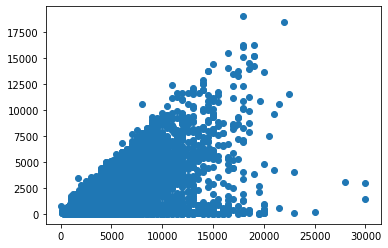

In [17]:
# plot data points to visually see where they are
# on small and distinctive dataset, easier to see clusters
plt.scatter(df['CREDIT_LIMIT'],df['BALANCE'])

In [ ]:
#Dropping NAN values

In [18]:
#df.dropna(axis=0, how='any')

df.dropna(axis=0, how='any', inplace=True)

In [19]:
#make a dataframe called X to hold the predictive features (exclude the category)
x= df.drop('BALANCE', axis=1)
x.head()



,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,95.40,0.000000,0.166667,1000.0,201.802084
1,0.00,6442.945483,0.000000,7000.0,4103.032597
2,773.17,0.000000,1.000000,7500.0,622.066742
3,1499.00,205.788017,0.083333,7500.0,0.000000
4,16.00,0.000000,0.083333,1200.0,678.334763


In [11]:
# dataframe of one column
# holds target variable "category"

# copy the category to y:
y=df['BALANCE'].copy()
y.head()

0      40.900749
1    3202.467416
2    2495.148862
3    1666.670542
4     817.714335
Name: BALANCE, dtype: float64

In [20]:
#initialize k-means function
#set number of clusters to categorize = 4
kmeans = KMeans(n_clusters=4)

#the model will learn which data points appear similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
#data point coordinates for centroids of each cluster
#index 0 is blue cluster
#index 1 is yellow cluster
#index 2 is purple cluster
#index 3 is red cluster
print(kmeans.cluster_centers_)

[[4.86657687e+02 4.62249442e+02 4.46775925e-01 2.11324453e+03
  8.41631851e+02]
 [9.82518618e+03 6.39222435e+03 6.80019699e-01 1.24113821e+04
  1.91289120e+04]
 [1.99224506e+03 2.71283105e+03 5.63463436e-01 1.18517652e+04
  3.61518050e+03]
 [1.27615007e+03 1.15523061e+03 5.42608655e-01 6.30755361e+03
  2.04454557e+03]]


In [23]:
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,40.900749,95.40,0.000000,0.166667,1000.0,201.802084
1,3202.467416,0.00,6442.945483,0.000000,7000.0,4103.032597
2,2495.148862,773.17,0.000000,1.000000,7500.0,622.066742
3,1666.670542,1499.00,205.788017,0.083333,7500.0,0.000000
4,817.714335,16.00,0.000000,0.083333,1200.0,678.334763


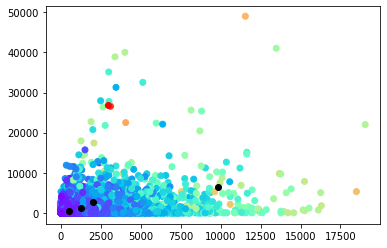

In [25]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df['BALANCE'],df['PURCHASES'], c=df['CREDIT_LIMIT'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')